# Kaggle Housing Prices Challenge

### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 

### Data
Ames, Iowa, residential property prices 2006-2010.<br>
2930 observations. <br>
79 describing variables (20 continuous, 14 discrete, 23 nominal, 23 ordinal).<br>
Variable description: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt. <br>
The data set is available at: <br>
http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls.<br> http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt. 

# Introduction

This is my first begin-to-end data science project and also the first one I have shared online. I have tried to include several different concept in a pragmatic way, where I applied the 80/20 rule in going for the optimal regression score or exhaustive feature engineering.
To really test myself, I have not looked at any of the other Kaggle submissions, so I probably missed some very obvious observations or made some beginner mistakes. All feedback is very welcome.<br>

# Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Reading the data

In [2]:
housing = pd.read_csv('housing_train.csv')

In [3]:
housing_test = pd.read_csv('housing_test.csv')

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Useful functions

In [8]:
int(len(housing['LotShape'].unique())/3)

1

In [9]:
def feature_charts(column_name):
    nr_charts = len(housing[column_name].unique())
    rows = int(nr_charts/3) + 1
    columns = 3
    plt.figure(figsize=(15,rows * 4))
    index = 0
    categories = pd.Series(housing[column_name].unique()).sort_values()
    for cat in categories:
        index += 1
        plt.subplot(rows,columns,index)
        plt.xlim(0, 700)
        plt.title(cat)
        sns.distplot(housing[housing[column_name] == cat]['SalePrice']*1/1000, bins = 10)

    plt.tight_layout()

In [10]:
def feature_summary(column_name):
    categories = pd.Series(housing[column_name].unique())
    
    counts = pd.Series(housing[column_name].value_counts())
    prices = housing.groupby(column_name)['SalePrice'].mean().apply(lambda x: int(x * 1/1000))
    area = housing.groupby(column_name)['total_area'].mean().apply(lambda x: int(x))
    price_meter = (prices / area * 1000).apply(lambda x: round(x,1))
    data = {'counts':counts,'prices (k)':prices,'total area':area,'price per m2':price_meter}
    
    summary = pd.DataFrame(data,index=categories)
    
    return summary

In [11]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Data exploration & cleaning

Expected important variables: <br>
Total area, ground are, fireplace (Y/N), garage, lot area, neighbourhood (set of dummy indicators) <br>
Ordinal are more difficult, can help to convert the 5point and 10point scales into fewer categories.

Column renaming: not necessary for now.

### Dropping variables

Ok, which variables can we immediately drop, because there are almost no values, or we can safely assume they do not have a useful meaning. 

Maybe sort columns on number of missing values. Consider ones with least amount of values.

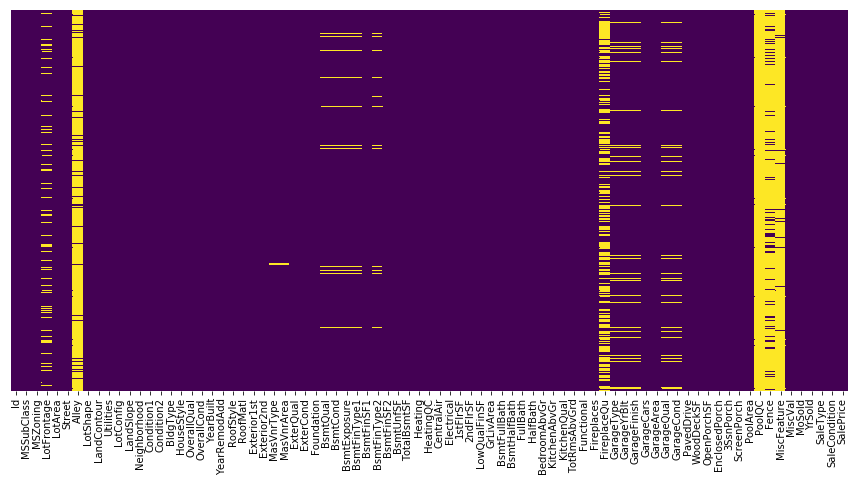

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(housing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
missing_values = len(housing) - housing.count()
missing_values.sort_values(ascending=False)[:12]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
dtype: int64

In [14]:
housing['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [15]:
housing['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [16]:
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [17]:
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Pool quality has just 5 data points. Alley I'll also drop. Misc we will turn into a shed dummy. Fence might also be of use. 

In [18]:
housing = housing.drop(columns=['PoolQC','Alley'])

In [19]:
housing['MiscFeature'] = housing['MiscFeature'].replace('Gar2',np.NaN)
housing['MiscFeature'] = housing['MiscFeature'].replace('Othr',np.NaN)
housing['MiscFeature'] = housing['MiscFeature'].replace('TenC',np.NaN)
housing['MiscFeature'].value_counts()

Shed    49
Name: MiscFeature, dtype: int64

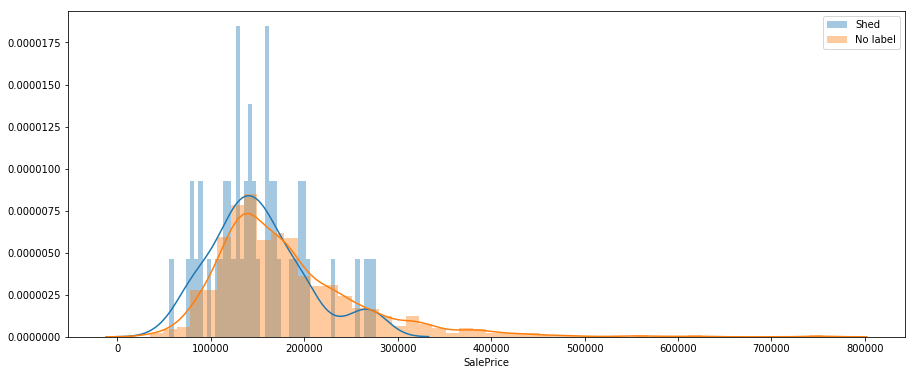

In [20]:
plt.figure(figsize=(15,6))
sns.distplot(housing[housing['MiscFeature'] == 'Shed']['SalePrice'],bins=50,label='Shed')
sns.distplot(housing[housing['MiscFeature'].isnull()]['SalePrice'],bins=50,label='No label')
plt.legend()

In [21]:
housing['shed'] = pd.get_dummies(housing['MiscFeature'])['Shed']

In [22]:
if 'MiscFeature' in housing.columns:
    housing.drop(['MiscFeature'],axis=1,inplace=True)

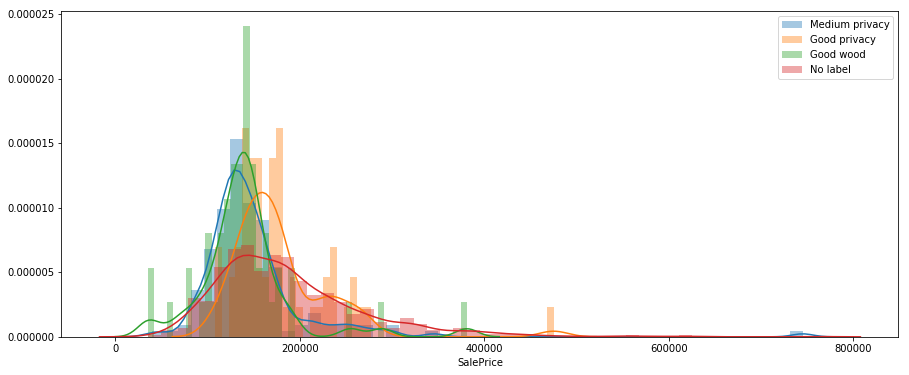

In [23]:
plt.figure(figsize=(15,6))
sns.distplot(housing[housing['Fence'] == 'MnPrv']['SalePrice'],bins=50,label='Medium privacy')
sns.distplot(housing[housing['Fence'] == 'GdPrv']['SalePrice'],bins=50,label='Good privacy')
sns.distplot(housing[housing['Fence'] == 'GdWo']['SalePrice'],bins=50,label='Good wood')
sns.distplot(housing[housing['Fence'].isnull()]['SalePrice'],bins=50,label='No label')
plt.legend()

These are actually two different variables: privacy and wood quality. The wood quality sample is too small, so I'll add those to no label. Privacy does show enough difference in distribution to include in our analysis. It also makes sense. I do expect it to be correlated to garden size. 

In [24]:
housing['Fence'] = housing['Fence'].replace('GdWo',np.NaN)
housing['Fence'] = housing['Fence'].replace('MnWw',np.NaN)

In [25]:
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
Name: Fence, dtype: int64

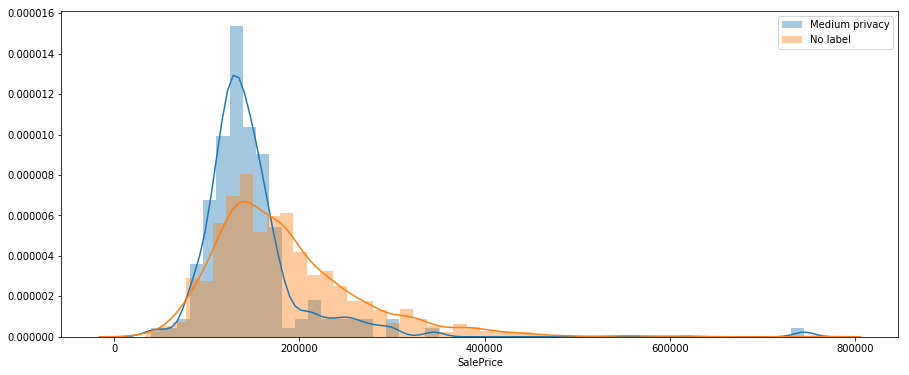

In [26]:
plt.figure(figsize=(15,6))
sns.distplot(housing[housing['Fence'] == 'MnPrv']['SalePrice'],bins=50,label='Medium privacy')
#sns.distplot(housing[housing['Fence'] == 'GdPrv']['SalePrice'],bins=50,label='Good privacy')
sns.distplot(housing[housing['Fence'].isnull()]['SalePrice'],bins=50,label='No label')
plt.legend()

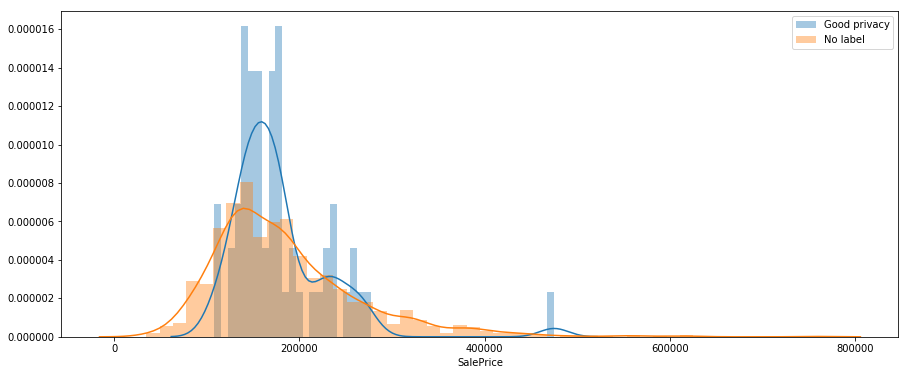

In [27]:
plt.figure(figsize=(15,6))
#sns.distplot(housing[housing['Fence'] == 'MnPrv']['SalePrice'],bins=50,label='Medium privacy')
sns.distplot(housing[housing['Fence'] == 'GdPrv']['SalePrice'],bins=50,label='Good privacy')
sns.distplot(housing[housing['Fence'].isnull()]['SalePrice'],bins=50,label='No label')
plt.legend()

In [28]:
housing['good_privacy'] = pd.get_dummies(housing['Fence'])['GdPrv']
housing['medium_privacy'] = pd.get_dummies(housing['Fence'])['MnPrv']

In [29]:
housing.drop(['Fence'],axis=1,inplace=True)

## Sales price

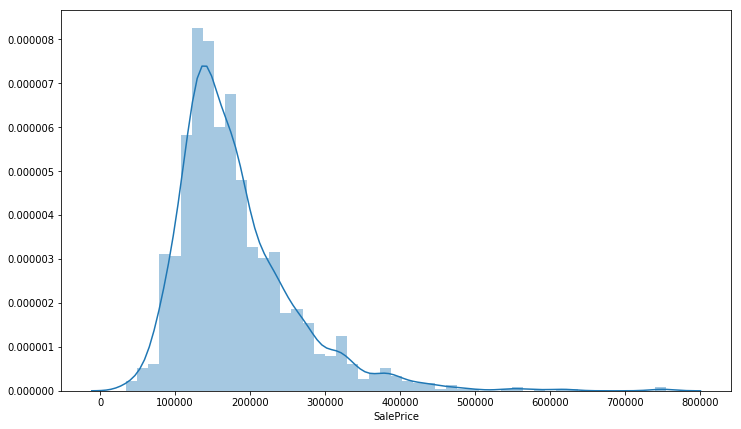

In [30]:
plt.figure(figsize=(12, 7))
sns.distplot(housing['SalePrice'])

In [31]:
# Highest prices
housing['SalePrice'].sort_values(ascending=False)[:10]

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
Name: SalePrice, dtype: int64

In [32]:
# Lowest prices
housing['SalePrice'].sort_values()[:10]

495     34900
916     35311
968     37900
533     39300
30      40000
710     52000
1337    52500
705     55000
1325    55000
812     55993
Name: SalePrice, dtype: int64

Maybe zoom in on outliers...

In [33]:
# Highest prices
housing['TotalBsmtSF'].sort_values(ascending=False)[:5]

1298    6110
332     3206
496     3200
523     3138
440     3094
Name: TotalBsmtSF, dtype: int64

In [34]:
# 1 clear outlier, delete
housing.loc[1298];
housing = housing[housing.TotalBsmtSF < 6000]

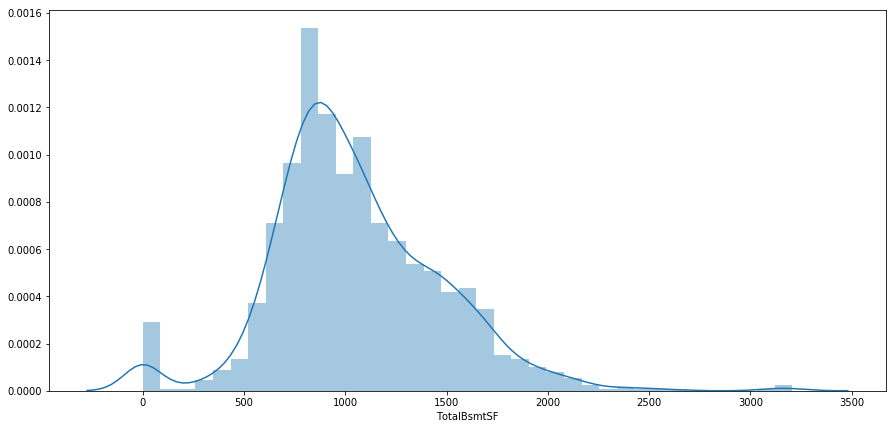

In [35]:
plt.figure(figsize=(15, 7))
sns.distplot(housing['TotalBsmtSF'])

In [36]:
housing[housing['TotalBsmtSF'] == 0].shape

(37, 80)

37 zero values. Drop? For now yes.

In [37]:
housing = housing[housing['TotalBsmtSF'] != 0]

We'll do the same exercise for Ground living area.

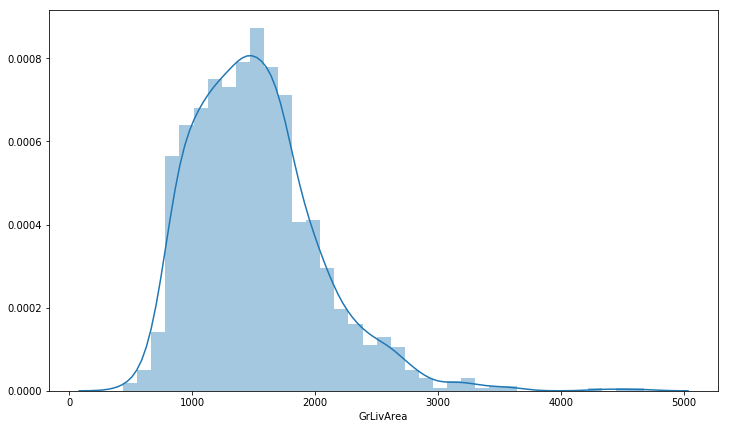

In [38]:
plt.figure(figsize=(12,7))
sns.distplot(housing['GrLivArea'])

In [39]:
housing['GrLivArea'].sort_values(ascending=False)[:5]

523     4676
1182    4476
691     4316
1169    3627
185     3608
Name: GrLivArea, dtype: int64

In [40]:
housing['GrLivArea'].sort_values()[:5]

1100    438
916     480
29      520
528     605
696     616
Name: GrLivArea, dtype: int64

Very skewed, interesting. 3 real outliers, let's remove those.

In [41]:
housing = housing[housing['GrLivArea'] < 4000]

Let's look at some first correlations (we'll try out different plots). Both variables seem to be quite useful.

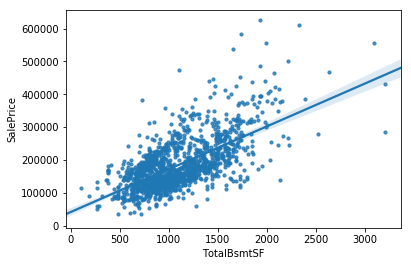

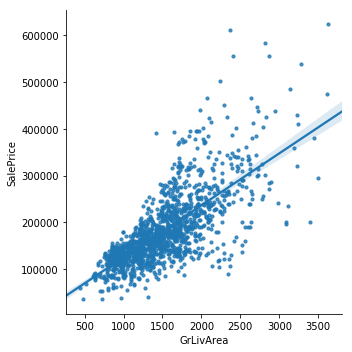

In [42]:
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=housing[['TotalBsmtSF','SalePrice']],scatter_kws={"s": 10})
sns.lmplot(x='GrLivArea',y='SalePrice',data=housing[['GrLivArea','SalePrice']],scatter_kws={"s": 10})
#sns.jointplot(x='GrLivArea',y='SalePrice',data=housing[['GrLivArea','SalePrice']],alpha=0.1,size=5)

These two seem correlated as well. There even is a fixed ratio (similar houses?) for a number of the houses. 

C:\Users\Gebruiker\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


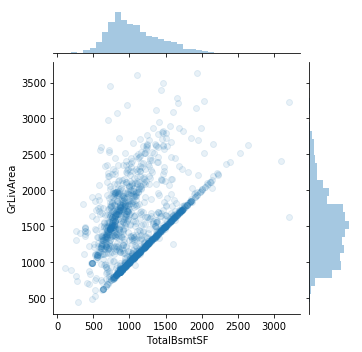

In [43]:
sns.jointplot(x='TotalBsmtSF',y='GrLivArea',data=housing[['TotalBsmtSF','GrLivArea']],alpha=0.1,size=5)

In [44]:
housing['total_area'] = housing['TotalBsmtSF'] + housing['GrLivArea']

In [45]:
smallest = pd.DataFrame(housing['total_area'].sort_values()[-5:])
largest = pd.DataFrame(housing['total_area'].sort_values()[:5])
display_side_by_side(smallest,largest)

,total_area
1373,5266
1353,5271
440,5496
1169,5557
496,6428
,total_area
1100,728
916,960
710,999
872,1015


## Other variables

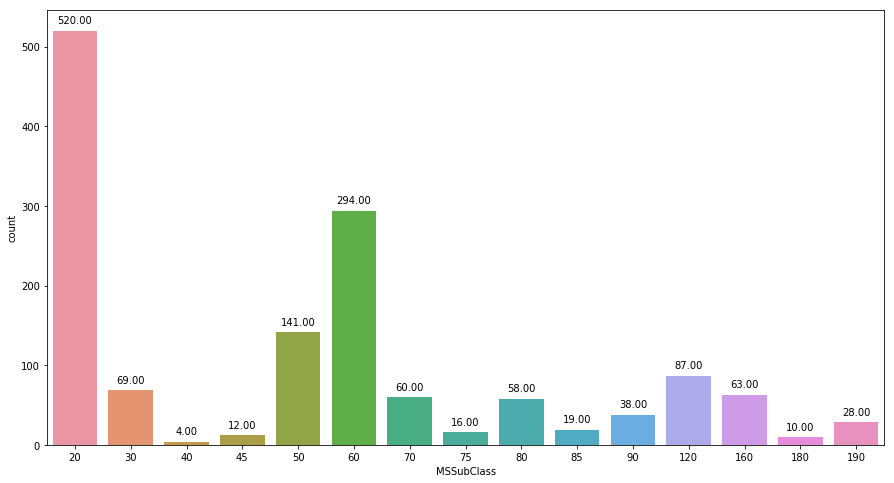

In [46]:
plt.figure(figsize=(15,8))
splot = sns.countplot(x='MSSubClass',data=housing)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

These are too many categories, so would be nice if we could group them. Perhaps something like Old vs New and 1 story vs 2 stories, that's only 4 categories. <br>
We start by simply looking that the average sale price per category. Then we could make a series of charts showing the distributions.

In [47]:
dwelling = pd.Series(housing['MSSubClass'].unique()).sort_values()
for d in dwelling:
    print('dwelling',d,'avg price',int(housing[housing['MSSubClass'] == d]['SalePrice'].mean()*1/1000),
          'K and avg area',int(housing[housing['MSSubClass'] == d]['total_area'].mean()))

dwelling 20 avg price 187 K and avg area 2654
dwelling 30 avg price 95 K and avg area 1693
dwelling 40 avg price 156 K and avg area 2349
dwelling 45 avg price 108 K and avg area 1679
dwelling 50 avg price 144 K and avg area 2427
dwelling 60 avg price 237 K and avg area 2980
dwelling 70 avg price 166 K and avg area 2595
dwelling 75 avg price 192 K and avg area 3208
dwelling 80 avg price 169 K and avg area 2317
dwelling 85 avg price 145 K and avg area 1932
dwelling 90 avg price 143 K and avg area 2917
dwelling 120 avg price 200 K and avg area 2612
dwelling 160 avg price 138 K and avg area 2058
dwelling 180 avg price 102 K and avg area 1386
dwelling 190 avg price 133 K and avg area 2513


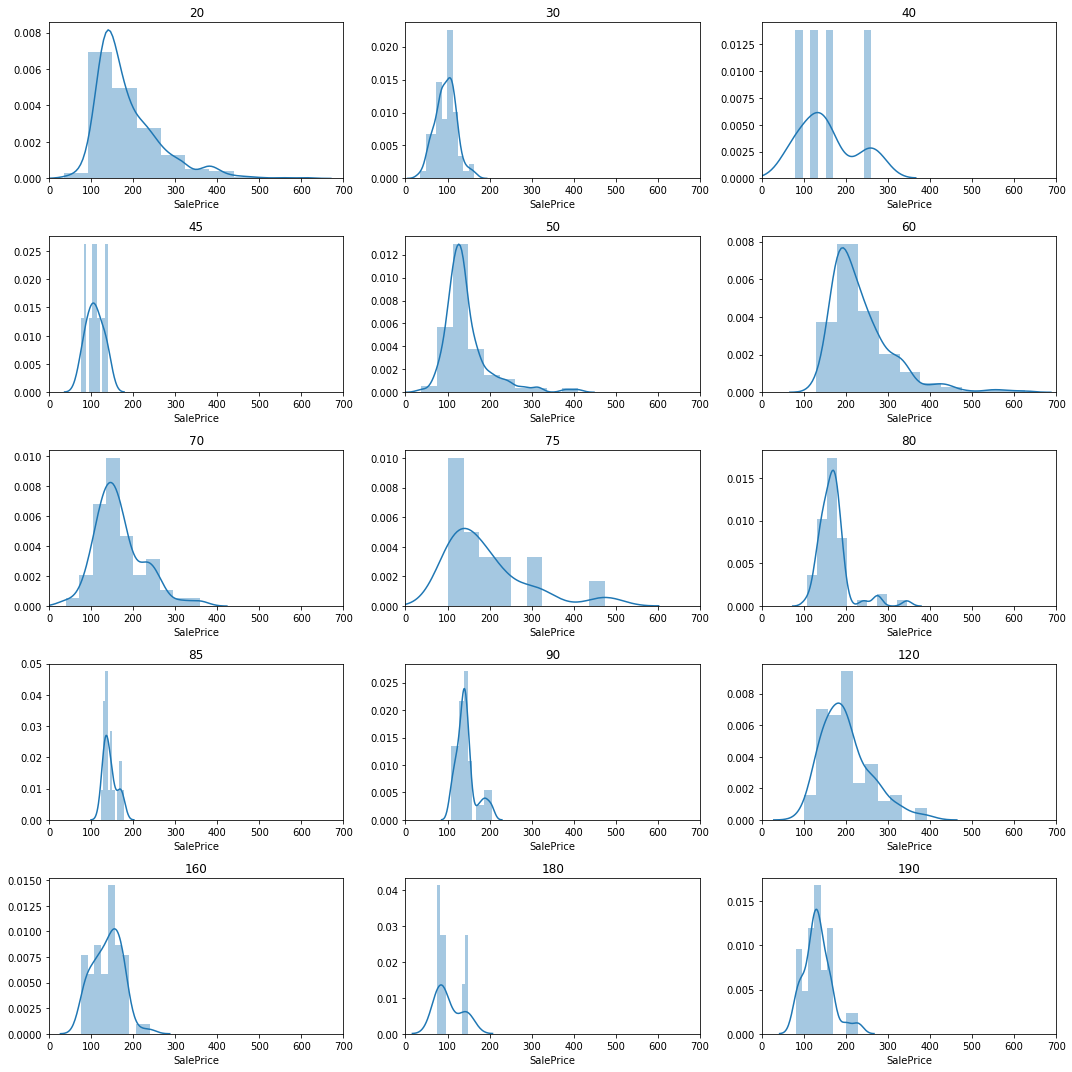

In [48]:
plt.figure(figsize=(15,15))
index = 0
for d in dwelling:
    index += 1
    plt.subplot(5,3,index)
    plt.xlim(0, 700)
    plt.title(d)
    sns.distplot(housing[housing['MSSubClass'] == d]['SalePrice']*1/1000, bins = 10)
    
plt.tight_layout()

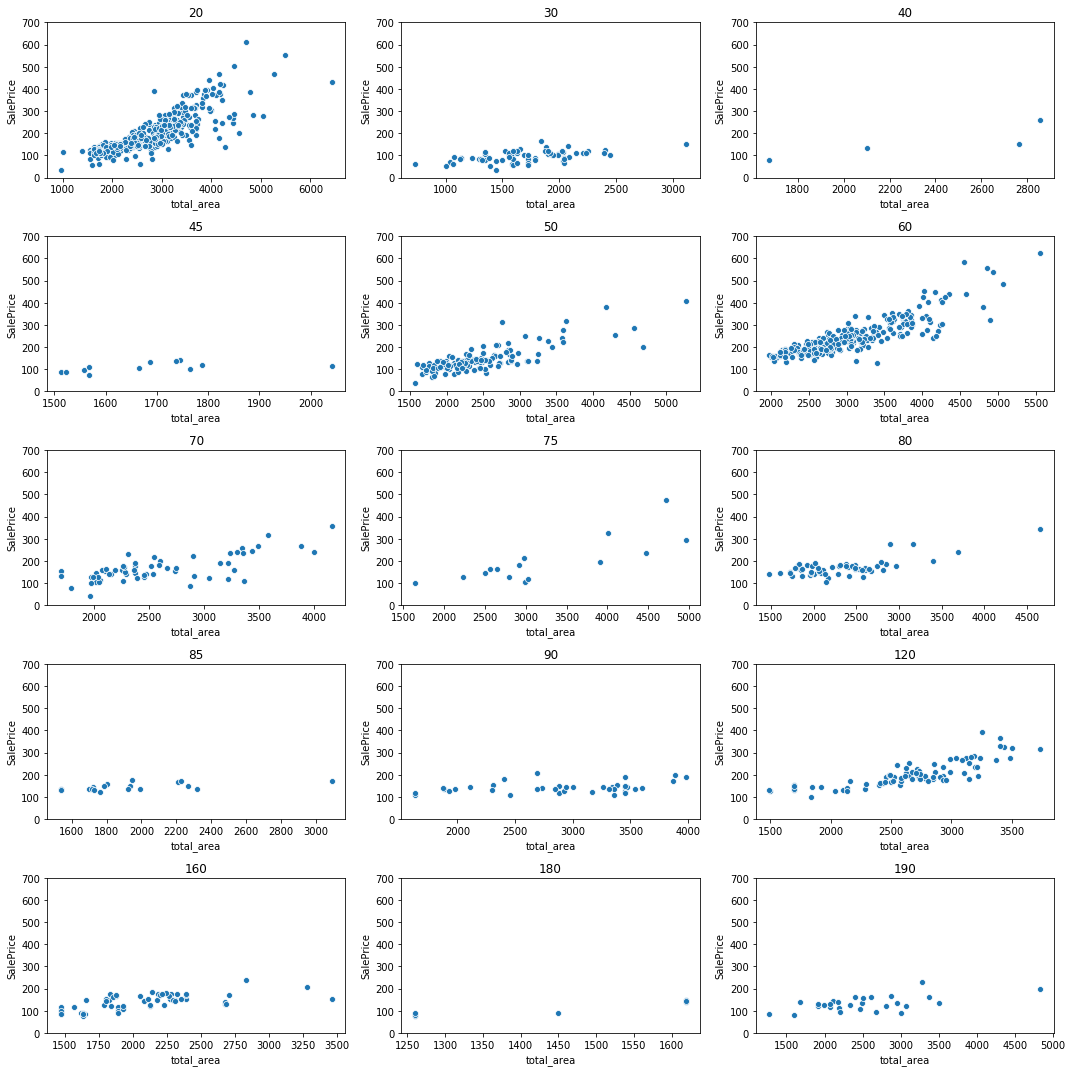

In [49]:
plt.figure(figsize=(15,15))
index = 0
for d in dwelling:
    index += 1
    plt.subplot(5,3,index)
    plt.ylim(0, 700)
    plt.title(d)
    sns.scatterplot(y=housing[housing['MSSubClass'] == d]['SalePrice']*1/1000,
                    x=housing[housing['MSSubClass'] == d]['total_area'])
    
plt.tight_layout()

For now it is not clear enough how to group: <br>
One this we could ignore the PUD (planned unit development) suffix, but eg 60 and 160  have very different scatters.

In [50]:
for d in dwelling:
    housing[d] = pd.get_dummies(housing['MSSubClass'])[d]

**Zoning**

In [51]:
# We first write out the labels, because the original labels are not clear.
housing['MSZoning'] = housing['MSZoning'].replace('RL','low_density')
housing['MSZoning'] = housing['MSZoning'].replace('RM','medium_density')
housing['MSZoning'] = housing['MSZoning'].replace('FV','floating_village')
housing['MSZoning'] = housing['MSZoning'].replace('RH','high_density')

housing['MSZoning'].value_counts()

low_density         1115
medium_density       214
floating_village      65
high_density          15
C (all)               10
Name: MSZoning, dtype: int64

In [52]:
housing[housing['MSZoning'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,60,70,75,80,85,90,120,160,180,190


This might be useful. Commercial is a very different type of real estate, and only 10 houses, so we leave those out. <br>
After looking it up, a floating village seems to represent a retirement. This group is too large to leave out for now, but we later we need to look at this more carefully. I would like to turn this into a density variable.

In [53]:
housing['MSZoning'] = housing['MSZoning'].replace('C (all)',np.NaN)

In [54]:
housing['MSZoning'] = housing['MSZoning'].fillna('commercial')

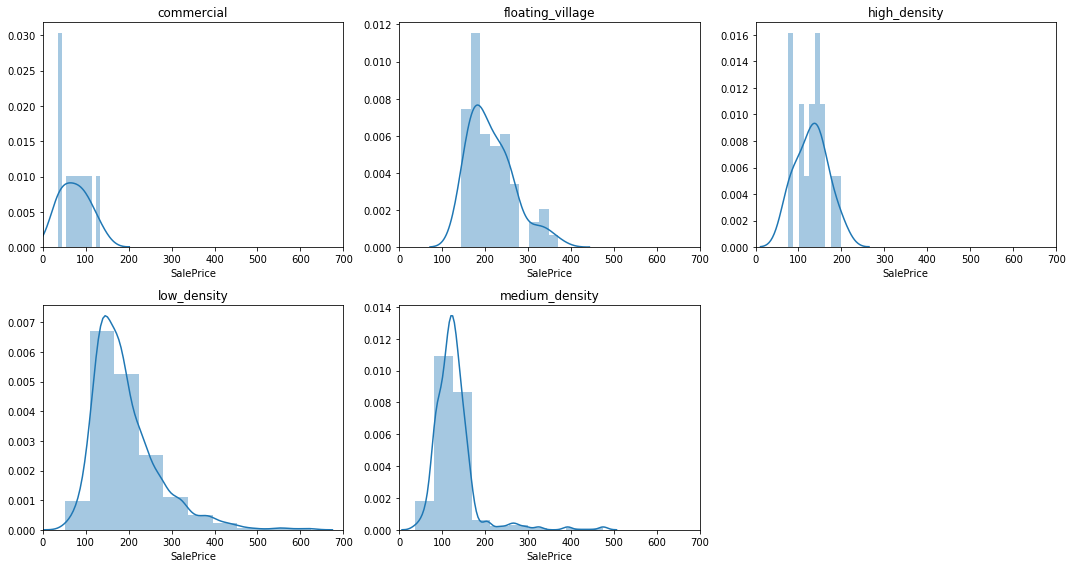

In [55]:
plt.figure(figsize=(15,8))
index = 0
zoning = pd.Series(housing['MSZoning'].unique()).sort_values()
for z in zoning:
    index += 1
    plt.subplot(2,3,index)
    plt.xlim(0, 700)
    plt.title(z)
    sns.distplot(housing[housing['MSZoning'] == z]['SalePrice']*1/1000, bins = 10)
    
plt.tight_layout()

Differences in sale price distribution seem substantial for different zonings. Convert into dummies.

In [56]:
for z in zoning:
    housing[z] = pd.get_dummies(housing['MSZoning'])[z]

**Lot frontage**

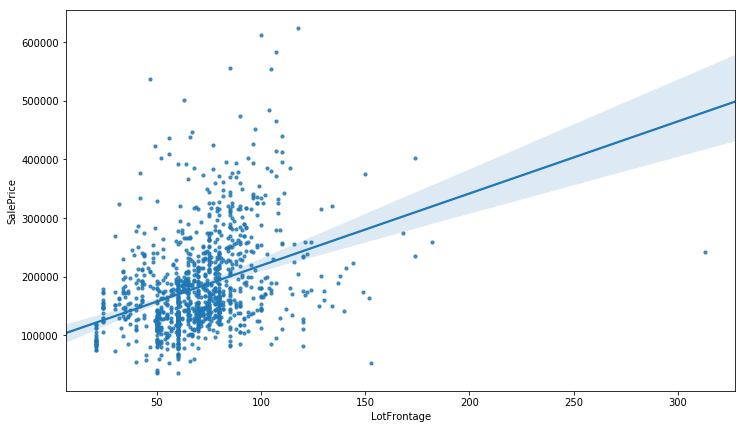

In [57]:
#Lot Frontage
#If used, maybe exclude the value with >300.
#Is related to lot area.
plt.figure(figsize=(12,7))
sns.regplot(x='LotFrontage',y='SalePrice',data=housing,scatter_kws={"s": 10})

In [58]:
housing['LotFrontage'].sort_values(ascending=False)[:10]

934     313.0
1127    182.0
197     174.0
231     174.0
1107    168.0
1337    153.0
1211    152.0
313     150.0
909     149.0
807     144.0
Name: LotFrontage, dtype: float64

In [59]:
housing.shape

(1419, 101)

In [60]:
housing[housing['LotFrontage'].isnull() == True].shape

(253, 101)

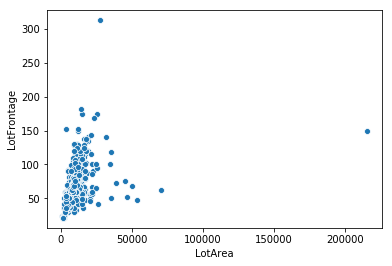

In [61]:
sns.scatterplot(x='LotArea',y='LotFrontage',data=housing)

Quite some lot frontage data missing. It makes sense that lot frontage is related to lot area. Lot area does not have any missing values, so we use this to impute missing data. Next to this we drop the outlier for lot frontage and the three outliers for lot area.

In [62]:
housing['LotArea'].sort_values(ascending = False)[:10]

313     215245
335     164660
249     159000
706     115149
451      70761
1396     57200
769      53504
457      53227
384      53107
53       50271
Name: LotArea, dtype: int64

In [63]:
housing = housing[housing['LotArea'] < 115000]

In [64]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotArea'] * 
    1/pd.Series(housing['LotArea']/housing['LotFrontage']).mean())

In [65]:
# Now we can delete the outlier without deleting all the nan rows:
housing = housing[housing['LotFrontage'] < 300]

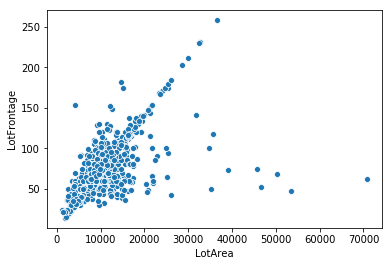

In [66]:
sns.scatterplot(x='LotArea',y='LotFrontage',data=housing)

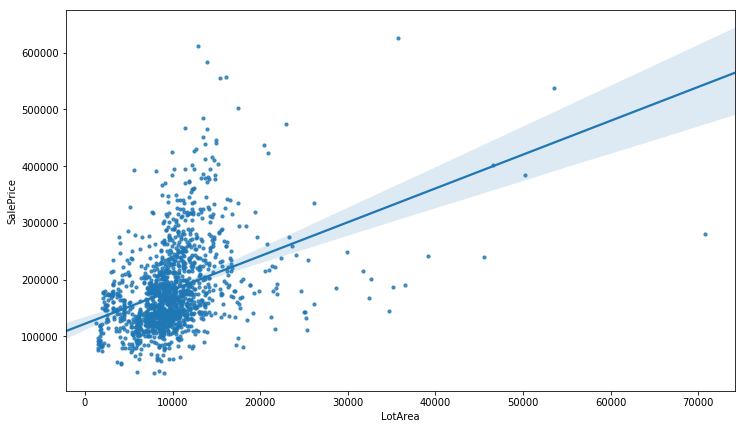

In [67]:
plt.figure(figsize=(12,7))
sns.regplot(x='LotArea',y='SalePrice',data=housing,scatter_kws={"s": 10})

**Street**

In [68]:
#Street: type of road access
housing['Street'].value_counts()

Pave    1406
Grvl       5
Name: Street, dtype: int64

Sample too small for gravel, so we delete the column.

In [69]:
housing = housing.drop(columns=['Street'])

**LotShape**

In [70]:
housing['LotShape'].value_counts()

Reg    893
IR1    474
IR2     36
IR3      8
Name: LotShape, dtype: int64

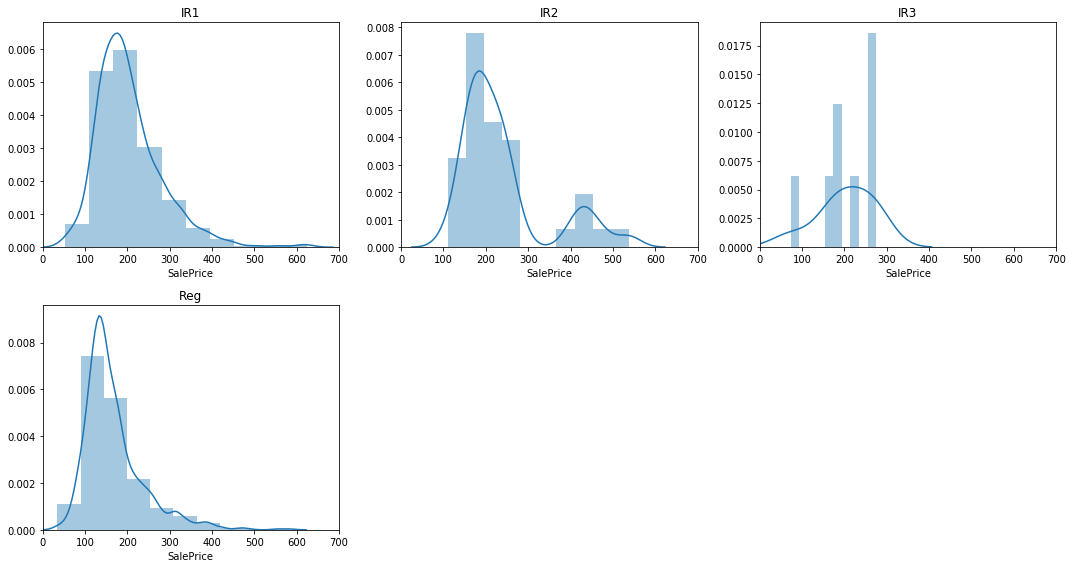

In [71]:
feature_charts('LotShape')

We could turn this into a regular/irregular variable. It makes sense that big expensive houses have a somewhat irregular shape. <br>
We will not use it in the first models.

In [72]:
housing['LandContour'].value_counts()

Lvl    1276
Bnk      58
HLS      48
Low      29
Name: LandContour, dtype: int64

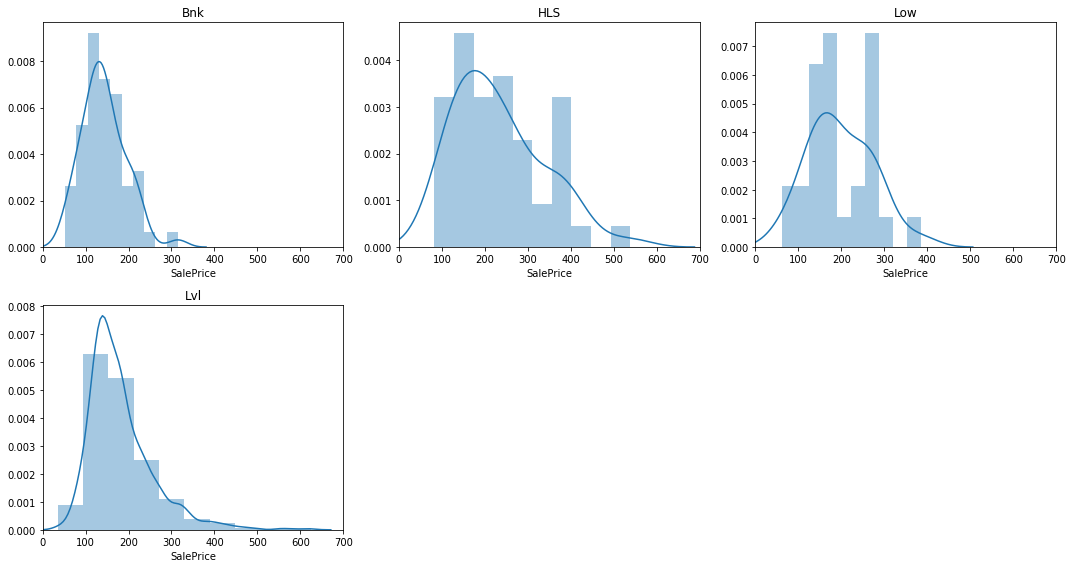

In [73]:
feature_charts('LandContour')

This could very well be neighborhood dependent. Let's consider it a HUE when we look closer at the neighborhoods. 

**Utilities**

In [74]:
housing['Utilities'].value_counts()

AllPub    1410
NoSeWa       1
Name: Utilities, dtype: int64

This would have been a very strong feature, but the US is not a third world country, so all houses have all utilities. We drop the variable.

In [75]:
housing = housing.drop(columns='Utilities')

**Lot configuration**

In [76]:
housing['LotConfig'].value_counts()

Inside     1020
Corner      252
CulDSac      89
FR2          46
FR3           4
Name: LotConfig, dtype: int64

In [77]:
categories = pd.Series(housing['LotConfig'].unique())
categories

0     Inside
1        FR2
2     Corner
3    CulDSac
4        FR3
dtype: object

In [78]:
housing['LotConfig'].value_counts().shape

(5,)

In [79]:
feature_summary('LotConfig')

,counts,prices (k),total area,price per m2
Inside,1020,178,2560,69.5
FR2,46,179,2474,72.4
Corner,252,178,2610,68.2
CulDSac,89,224,2867,78.1
FR3,4,208,2698,77.1


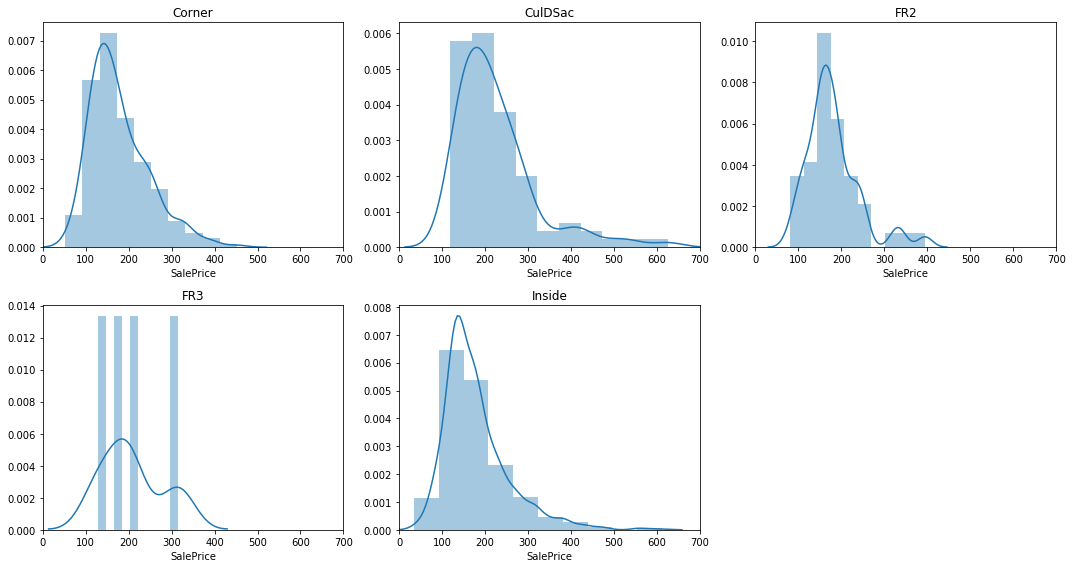

In [80]:
feature_charts('LotConfig')

Distributions seems very similar, except for CulDSac. And FR3 sample is too small. Do not use for now.

In [81]:
feature_summary('LandSlope')

,counts,prices (k),total area,price per m2
Gtl,1342,181,2581,70.1
Mod,61,196,2702,72.5
Sev,8,164,2554,64.2


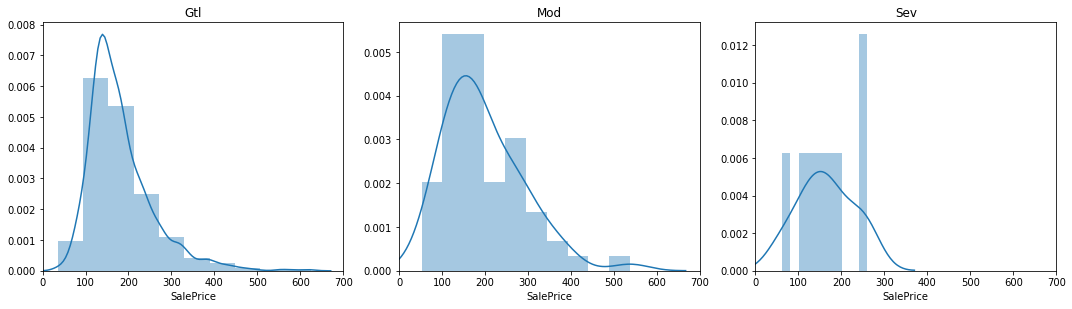

In [82]:
feature_charts('LandSlope')

Samples too small to be useful for now.

In [83]:
feature_summary('Neighborhood')

,counts,prices (k),total area,price per m2
CollgCr,150,197,2638,74.7
Veenker,11,238,2860,83.2
Crawfor,51,210,2824,74.4
NoRidge,39,314,3858,81.4
Mitchel,47,157,2416,65.0
Somerst,86,225,2729,82.4
NWAmes,73,189,2881,65.6
OldTown,111,128,2311,55.4
BrkSide,55,128,2040,62.7
Sawyer,72,137,2198,62.3


This is a clear feature. Just a large number of categories, with some having very small samples.

In [84]:
for n in housing['Neighborhood'].unique():
    housing[n] = pd.get_dummies(housing['Neighborhood'])[n]

We save these for later: 'Condition1', 'Condition2', 

Let's look at 'BldgType' and 'HouseStyle'. These are also related to MSSubClass.

In [85]:
feature_summary('BldgType')

,counts,prices (k),total area,price per m2
1Fam,1188,185,2615,70.7
2fmCon,28,128,2462,52.0
TwnhsE,114,181,2407,75.2
Duplex,38,143,2917,49.0
Twnhs,43,135,2032,66.4


In [86]:
for d in housing['BldgType'].unique():
    housing[d] = pd.get_dummies(housing['BldgType'])[d]

In [87]:
feature_summary('HouseStyle')

,counts,prices (k),total area,price per m2
2Story,436,208,2784,74.7
1Story,694,178,2563,69.4
1.5Fin,147,142,2427,58.5
1.5Unf,14,110,1723,63.8
SFoyer,36,133,1840,72.3
SLvl,65,166,2268,73.2
2.5Unf,11,157,2788,56.3
2.5Fin,8,220,3810,57.7


In [88]:
for d in housing['HouseStyle'].unique():
    housing[d] = pd.get_dummies(housing['HouseStyle'])[d]

In [89]:
OQ = feature_summary('OverallQual').sort_index()
OC = feature_summary('OverallCond').sort_index()
display_side_by_side(OQ,OC)

,counts,prices (k),total area,price per m2
1,1,61,1587,38.4
2,3,51,917,55.6
3,14,84,1925,43.6
4,102,108,1940,55.7
5,380,133,2204,60.3
6,371,161,2444,65.9
7,315,206,2809,73.3
8,168,274,3365,81.4
9,43,367,3811,96.3
10,14,432,4357,99.2


We see very clearly that higher condition/quality makes for higher prices, which makes sense. Also interesting to see that higher quality correlates which larger houses. <br> 
I think we can combine these two into one feature.

In [90]:
housing['combined_condition'] = housing['OverallQual'] + housing['OverallCond']

In [91]:
feature_summary('combined_condition').sort_index()

,counts,prices (k),total area,price per m2
2,1,61,1587,38.4
5,4,64,1649,38.8
6,3,70,2108,33.2
7,8,100,2017,49.6
8,27,94,2136,44.0
9,66,120,2282,52.6
10,163,129,2231,57.8
11,301,151,2324,65.0
12,416,180,2560,70.3
13,271,228,2966,76.9


Now let's group into a smaller number of categories. <br>
- 2-8 will be low combined condition.
- 9-13 are larger groups with clear differences, so we will keep those.
- 14-19 will be high combined condition.<br>

Change to dummies or continuous scale?

In [92]:
for i in range(2,20):
    if i < 9:
        housing['combined_condition'] = housing['combined_condition'].replace(i,'quality_0')
    elif i > 13:
        housing['combined_condition'] = housing['combined_condition'].replace(i,'quality_6')
    else:
        medium_category = 'quality_'+str(i-8)
        housing['combined_condition'] = housing['combined_condition'].replace(i,medium_category)

In [93]:
feature_summary('combined_condition').sort_index()

,counts,prices (k),total area,price per m2
quality_0,43,90,2053,43.8
quality_1,66,120,2282,52.6
quality_2,163,129,2231,57.8
quality_3,301,151,2324,65.0
quality_4,416,180,2560,70.3
quality_5,271,228,2966,76.9
quality_6,151,269,3167,84.9


In [94]:
housing['combined_condition'] = housing['combined_condition'].replace(
    ['quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6'],[0,1,2,3,4,5,6])

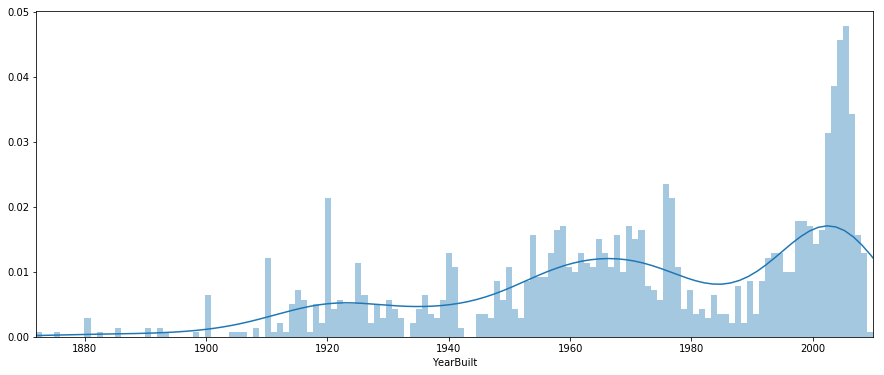

In [95]:
plt.figure(figsize=(15,6))
first = int(housing['YearBuilt'].min())
last = int(housing['YearBuilt'].max())
plt.xlim(first,last)
nr_bins = last - first + 1
sns.distplot(housing['YearBuilt'],bins=nr_bins)

We could group into something like:<br>
- really old: <1900
- pre world war 2: 1900-1942
- post world war 2: 1944-1985
- 90s: 1986-1999
- 00s: 2000-

Though these groups are kind of arbitrary. <br> Or keep as continuous.

In [96]:
old = pd.DataFrame(housing['YearBuilt'].sort_values()[:10])
new = pd.DataFrame(housing['YearBuilt'].sort_values()[-10:])
display_side_by_side(old,new)

,YearBuilt
1349,1872
1137,1875
304,1880
630,1880
1132,1880
747,1880
991,1882
1416,1885
106,1885
716,1890


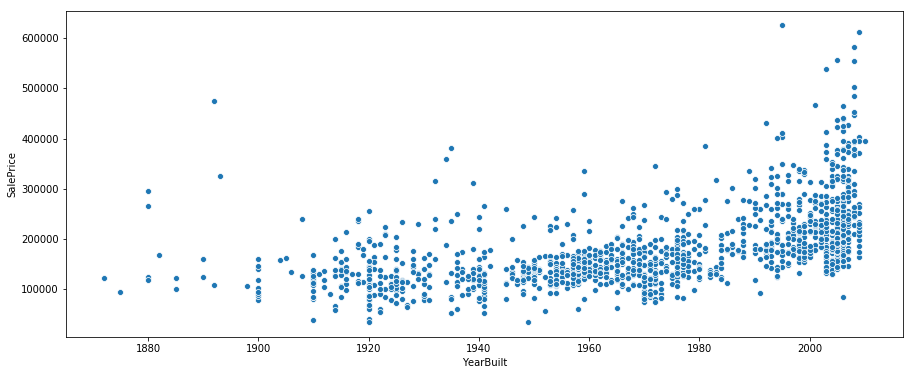

In [97]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='YearBuilt',y='SalePrice',data=housing)

'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 

'Heating', 'HeatingQC', 'CentralAir', 

In [98]:
Heating = feature_summary('Heating')
HeatingQC = feature_summary('HeatingQC')
CentralAir = feature_summary('CentralAir')
display_side_by_side(Heating,HeatingQC,CentralAir)

,counts,prices (k),total area,price per m2
GasA,1386,182,2587,70.4
GasW,16,158,2917,54.2
Grav,7,75,1534,48.9
OthW,2,125,2917,42.9
,counts,prices (k),total area,price per m2
Ex,726,214,2809,76.2
Gd,234,157,2387,65.8
TA,407,142,2342,60.6
Fa,43,130,2241,58.0
Po,1,87,1523,57.1


Heating we will drop.

In [99]:
housing = housing.drop(columns='Heating')

Let's take a look at air conditioning. Average highs in Ames in June-Aug are 27-29 Celsius, so I would like to have AC.

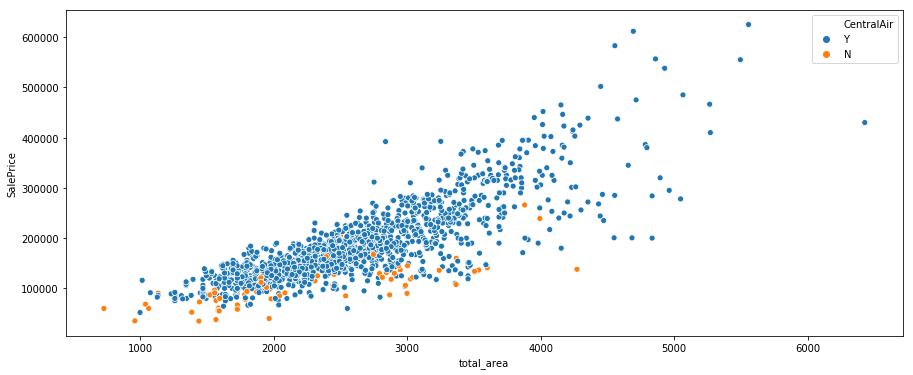

In [100]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='total_area',y='SalePrice',data=housing,hue='CentralAir')

Central Air is a clear feature, which we will include.

In [101]:
housing['CentralAir'] = housing['CentralAir'].replace(['Y','N'],[1,0])

Average lows in January in Ames are -11 Celsius, so I would also definitely like decent heating!

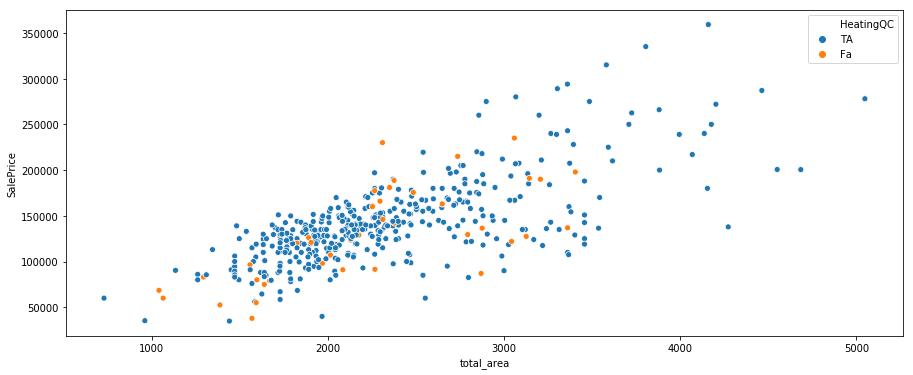

In [102]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='total_area',y='SalePrice',data=housing[housing['HeatingQC'].isin(['TA','Fa'])],hue='HeatingQC')

We will combine Fair and Average and Poor (only one data point).

In [103]:
housing['HeatingQC'] = housing['HeatingQC'].replace('Fa','TA')
housing['HeatingQC'] = housing['HeatingQC'].replace('Po','TA')

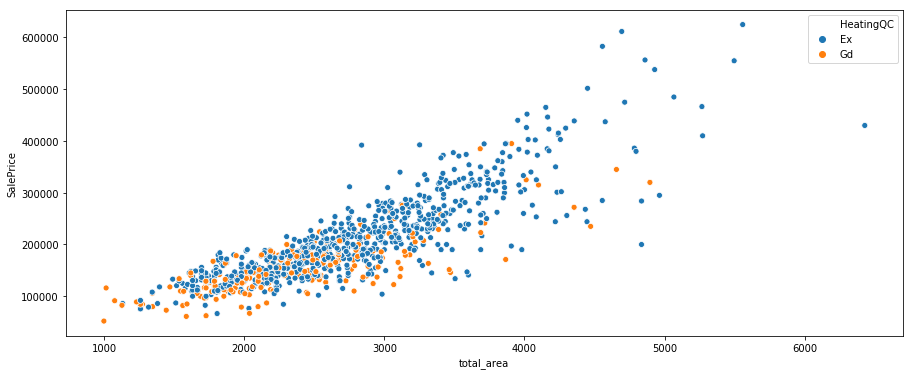

In [104]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='total_area',y='SalePrice',data=housing[housing['HeatingQC'].isin(['Ex','Gd'])],hue='HeatingQC')

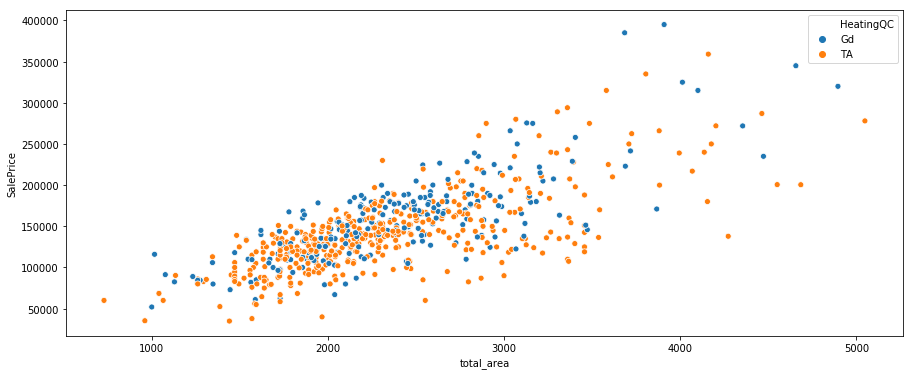

In [105]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='total_area',y='SalePrice',data=housing[housing['HeatingQC'].isin(['Gd','TA'])],hue='HeatingQC')

In [106]:
# do not use this after all, but change into numeric feature below.
housing['heating_excellent'] = pd.get_dummies(housing['HeatingQC'])['Ex']
housing['heating_good'] = pd.get_dummies(housing['HeatingQC'])['Gd']
housing['heating_average'] = pd.get_dummies(housing['HeatingQC'])['TA']

In [107]:
housing['HeatingQC'] = housing['HeatingQC'].replace(['TA','Gd','Ex'],[0,1,2])

# Alternative method, not used here:
# ordered_heating_quality = ['TA','Gd','Ex']
# housing.HeatingQC.astype("category", ordered=True,categories=ordered_heating_quality).cat.codes

Null values
'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea',

I looked up the definition: <br>
A full bathroom contains four key items: a bathtub, a shower, a toilet, and a sink with running water <br>
Half bathroom: This means in the case of the half bath there should be a room with a toilet and a sink. <br>
I think we can just add these (where a half bathroom is 0.5 bathroom) to get a total.

In [108]:
housing[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']][:15]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,0,2,1
1,0,1,2,0
2,1,0,2,1
3,1,0,1,0
4,1,0,2,1
5,1,0,1,1
6,1,0,2,0
7,1,0,2,1
8,0,0,2,0
9,1,0,1,0


In [109]:
housing[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].describe()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
count,1411.000000,1411.000000,1411.000000,1411.000000
mean,0.430900,0.058115,1.559178,0.392629
std,0.516407,0.240027,0.548246,0.505630
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000
max,3.000000,2.000000,3.000000,2.000000


In [110]:
housing['bathrooms'] = housing['BsmtFullBath'] + 0.5*housing['BsmtHalfBath'] + housing['FullBath'] + 0.5*housing['HalfBath']

In [111]:
feature_summary('bathrooms').sort_index()

,counts,prices (k),total area,price per m2
1.0,213,112,1901,58.9
1.5,129,142,2211,64.2
2.0,433,160,2457,65.1
2.5,294,199,2717,73.2
3.0,183,230,3085,74.6
3.5,143,273,3268,83.5
4.0,10,278,3945,70.5
4.5,4,403,4636,86.9
5.0,1,145,3472,41.8
6.0,1,179,2400,74.6


We group everything north of 3

In [112]:
for i in housing['bathrooms'].unique():
    if i > 3:
        housing['bathrooms'] = housing['bathrooms'].replace(i,3.5)

In [113]:
feature_summary('bathrooms').sort_index()

,counts,prices (k),total area,price per m2
1.0,213,112,1901,58.9
1.5,129,142,2211,64.2
2.0,433,160,2457,65.1
2.5,294,199,2717,73.2
3.0,183,230,3085,74.6
3.5,159,275,3341,82.3


In [114]:
housing = housing.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'])

In [115]:
Bedrooms = feature_summary('BedroomAbvGr').sort_index()
Kitchens = feature_summary('KitchenAbvGr').sort_index()
total_rooms = feature_summary('TotRmsAbvGrd').sort_index()
display_side_by_side(Bedrooms,Kitchens,total_rooms)

,counts,prices (k),total area,price per m2
0,6,221,2650,83.4
1,49,175,2197,79.7
2,339,160,2258,70.9
3,790,181,2568,70.5
4,199,219,3190,68.7
5,21,180,3363,53.5
6,6,143,3391,42.2
8,1,200,4835,41.4
,counts,prices (k),total area,price per m2
0,1,127,1925,66.0


This is very surprising (to me at least). The number of bedrooms has a negative impact on price. Maybe because larger rooms are better? <br>
Then, how does one have 0 bedrooms or kitchens? Maybe there is a combined living rooms / kitchen. <br>
We will change kitchens into 1 or >1. <br>
Total rooms is not supposed to include bathrooms, but does not equal bedrooms + kitchens. Perhaps also hallways, storage rooms, dining rooms, living rooms or dens are also counted separately, but not noted separately.

In [116]:
housing[housing['BedroomAbvGr'] == 0][['BedroomAbvGr','KitchenAbvGr','total_area','HouseStyle','MSZoning',"LotArea",'Neighborhood']]

,BedroomAbvGr,KitchenAbvGr,total_area,HouseStyle,MSZoning,LotArea,Neighborhood
53,0,1,3684,1Story,low_density,50271,Veenker
189,0,1,3186,1Story,low_density,4923,StoneBr
634,0,2,2112,SFoyer,low_density,6979,OldTown
1163,0,2,2456,SFoyer,low_density,12900,Sawyer
1213,0,1,1608,SLvl,low_density,10246,Sawyer
1270,0,1,2856,1Story,low_density,23595,ClearCr


In [117]:
housing['other_rooms'] = housing['TotRmsAbvGrd'] - housing['BedroomAbvGr'] - housing['KitchenAbvGr']
feature_summary('other_rooms').sort_index()

,counts,prices (k),total area,price per m2
0,7,102,1750,58.3
1,210,127,1909,66.5
2,520,151,2320,65.1
3,406,195,2779,70.2
4,180,236,3138,75.2
5,54,285,3609,79.0
6,24,340,3993,85.1
7,8,447,4489,99.6
8,2,406,4689,86.6


This is not negative, so there are indeed other types of rooms. Let's use this category instead of total.

In [118]:
#Kitchen quality
feature_summary('KitchenQual')

,counts,prices (k),total area,price per m2
Gd,577,212,2816,75.3
TA,703,140,2288,61.2
Ex,96,323,3559,90.8
Fa,35,110,2105,52.3


In [119]:
housing['KitchenQual'] = housing['KitchenQual'].replace(['Fa','TA','Gd','Ex'],[0,1,2,3])

In [120]:
#Deductions due to damage, no damage = typical functionality
feature_summary('Functional')

,counts,prices (k),total area,price per m2
Typ,1322,183,2577,71.0
Min1,26,147,2570,57.2
Maj1,14,153,2898,52.8
Min2,31,146,2620,55.7
Mod,12,188,3311,56.8
Maj2,5,85,2113,40.2
Sev,1,129,3401,37.9


In [121]:
#Really small subsets unfortunately. This could be an import price influencer. For now we make this binary.
housing['deductions'] = housing['Functional'].apply(lambda x: 0 if x == "Typ" else 1)

In [122]:
housing['deductions'].value_counts()

0    1322
1      89
Name: deductions, dtype: int64

Including the binary deductions variable has a negative impact on regression performance, so we exclude it.

In [123]:
#Alternatively we try to include all categories (Sev only 1, so add this to Maj2).
housing['Functional'] = housing['Functional'].replace(['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],[0,0,1,2,3,4,5])

In [124]:
housing['Functional'].value_counts()

5    1322
3      31
4      26
1      14
2      12
0       6
Name: Functional, dtype: int64

This performs even worse, which was kind of expected, so we fully exclude the variable.

In [125]:
feature_summary('Fireplaces')

,counts,prices (k),total area,price per m2
0,662,143,2224,64.3
1,640,212,2864,74.0
2,105,230,3127,73.6
3,4,275,3683,74.7


In [126]:
feature_summary('FireplaceQu')

,counts,prices (k),total area,price per m2
NaN,NaN,NaN,NaN,NaN
TA,306.0,204.0,2861.0,71.3
Gd,370.0,227.0,2972.0,76.4
Fa,32.0,165.0,2427.0,68.0
Ex,22.0,325.0,3797.0,85.6
Po,19.0,130.0,2093.0,62.1


In [127]:
housing['FireplaceQu'].isnull().value_counts()

False    749
True     662
Name: FireplaceQu, dtype: int64

Considering fireplace quality has many missing values and three small subsets, with the remaining two (TA and Gd) quite similar, we exclude this variable. <br>
Regarding the number of fireplaces, subsets 2 and 3 are small and do not seem to have to much influence, so we make this a binary variable.

In [128]:
housing['Fireplaces'] = housing['Fireplaces'].replace([2,3],[1,1])

In [129]:
housing['Fireplaces'].value_counts()

1    749
0    662
Name: Fireplaces, dtype: int64

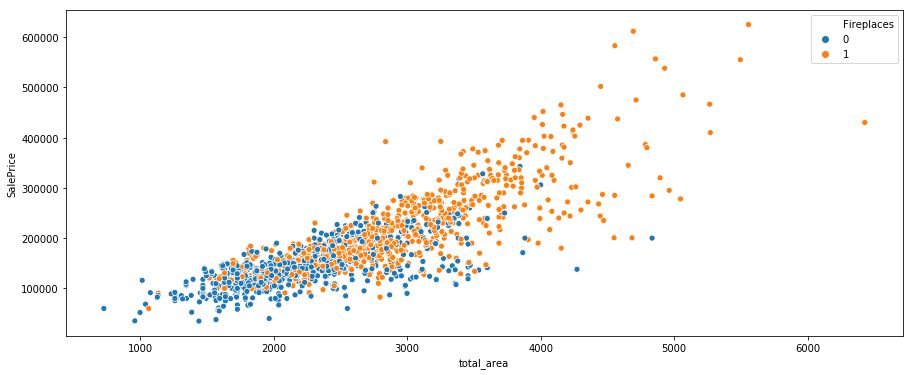

In [130]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='total_area',y='SalePrice',data=housing,hue='Fireplaces')

There are many variables (7 in total) all relating to the garage. Let's try to find out which one is most important. Another realisation, are the garage m2 part of the total area, therefore our other rooms variable?

In [131]:
display_side_by_side(feature_summary('GarageType'),feature_summary('GarageFinish'),feature_summary('GarageCars'))

,counts,prices (k),total area,price per m2
Attchd,851.0,201.0,2757.0,72.9
Detchd,368.0,135.0,2193.0,61.6
BuiltIn,86.0,256.0,3064.0,83.6
NaN,NaN,NaN,NaN,NaN
CarPort,7.0,113.0,2296.0,49.2
Basment,19.0,160.0,2477.0,64.6
2Types,6.0,151.0,2969.0,50.9
,counts,prices (k),total area,price per m2
RFn,417.0,201.0,2762.0,72.8
Unf,578.0,143.0,2295.0,62.3


In [132]:
display_side_by_side(feature_summary('GarageQual'),feature_summary('GarageCond'))

,counts,prices (k),total area,price per m2
TA,1269.0,187.0,2629.0,71.1
Fa,48.0,123.0,2244.0,54.8
Gd,14.0,215.0,2846.0,75.5
NaN,NaN,NaN,NaN,NaN
Ex,3.0,241.0,2653.0,90.8
Po,3.0,100.0,2181.0,45.9
,counts,prices (k),total area,price per m2
TA,1286.0,188.0,2631.0,71.5
Fa,33.0,116.0,2189.0,53.0
Gd,9.0,179.0,2554.0,70.1


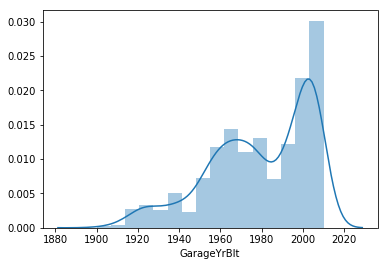

In [133]:
sns.distplot(housing[housing['GarageYrBlt']>0]['GarageYrBlt'])

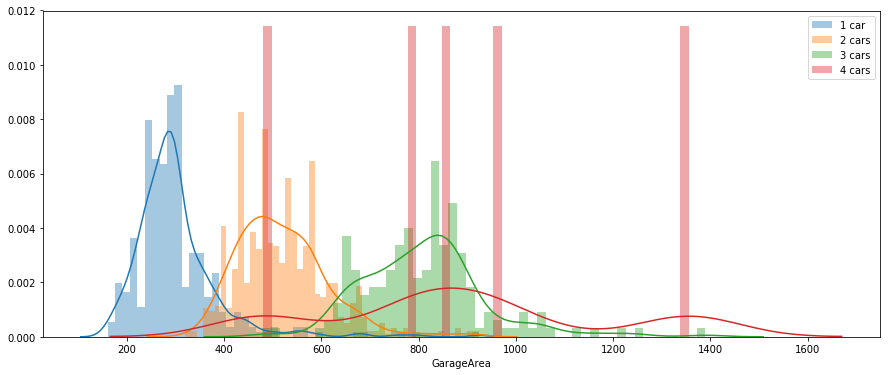

In [134]:
plt.figure(figsize=(15,6))
sns.distplot(housing[housing['GarageCars'] == 1]['GarageArea'],bins=50,label='1 car')
sns.distplot(housing[housing['GarageCars'] == 2]['GarageArea'],bins=50,label='2 cars')
sns.distplot(housing[housing['GarageCars'] == 3]['GarageArea'],bins=50,label='3 cars')
sns.distplot(housing[housing['GarageCars'] == 4]['GarageArea'],bins=50,label='4 cars')
plt.legend()

Except for 4 cars, there is a very clear correlation between area and number of cars. Therefore we could include just either one. Let's go for the simpler option, the number of cars. 4 we will turn into 3.

In [135]:
housing['GarageCars'] = housing['GarageCars'].replace([4],[3])

In [136]:
housing['GarageCars'].value_counts()

2    793
1    361
3    183
0     74
Name: GarageCars, dtype: int64

### Features not yet investigated:

 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 

'MoSold', 'YrSold',

 'SaleType', 'SaleCondition'

# Model training

Variables to include: <br>
- total area = Total BSMT SF + GR LIV AREA
- Lot area and/or Lot frontage
- MSSubClass or HouseStyle
- Zoning
- Neighborhood
- YearBuilt
- CentralAir, HeatingQC
- Bathrooms
- Kitchens
- Bedrooms
- Other rooms
- Kitchen quality
- Fireplaces
- Garage car capacity

Models: <br>
- Linear regression with one feature
- Linear regression with multiple features
- Polynomial regression
- Ridge, Lasso, Elastic-Net
- Random Forest
- Gradient Boosting
- Support Vector Regression

### Import packages (or do this per model?)

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn import metrics


### Useful functions

In [138]:
def linear_regression_report(y_test,predictions):
    MAE = metrics.mean_absolute_error(y_test,predictions)
    MSE = metrics.mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
    max_error = abs(y_test-predictions).max()
    float_ytest = y_test.astype(float)

    log_ytest = float_ytest['SalePrice'].apply(lambda x: math.log1p(x))
    log_predictions = predictions['SalePrice'].apply(lambda x: math.log1p(x))
    log_RMSE = np.sqrt(metrics.mean_squared_error(log_ytest,log_predictions))
    expl_var = metrics.explained_variance_score(y_test,predictions)

    print('Mean absolute error is',int(MAE))
    print('Mean squared error is',int(MSE))
    print('Root MSE is',int(RMSE))
    print('Maximum error is',int(max_error[0]))
    print('Log RMSE is',round(log_RMSE,3))
    print('Explained variance is',round(100*expl_var,3),"percent.")
    print('\n')    
    coeff = model_linear.coef_[0]
    intercept = round(model_linear.intercept_[0])
#     coeff_df = pd.DataFrame(coeff,index=X_train.columns,columns=['Coefficient'])
    print('Coefficient is',coeff)
    print('\n') 
    print('Intercept is',intercept)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title('errors of log price')
    sns.distplot(log_ytest-log_predictions)
    plt.subplot(1,2,2)
    plt.title('actuals errors in k dollars')
    sns.distplot(y_test*1/1000-predictions*1/1000)

In [139]:
def linear_fitting(X,y):
    model_linear = LinearRegression()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)
    model_linear.fit(X_train,y_train)
    predictions = pd.DataFrame(model_linear.predict(X_test),columns=['SalePrice'],index=y_test.index)
    
    return y_test,predictions;

In [140]:
def errors(y_test,predictions):
    MAE = metrics.mean_absolute_error(y_test,predictions)
    MSE = metrics.mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
    max_error = abs(y_test-predictions).max()[0]
    float_ytest = y_test.astype(float)

    log_ytest = float_ytest['SalePrice'].apply(lambda x: math.log1p(x))
    log_predictions = predictions['SalePrice'].apply(lambda x: math.log1p(x))
    log_RMSE = np.sqrt(metrics.mean_squared_error(log_ytest,log_predictions))
    expl_var = metrics.explained_variance_score(y_test,predictions)

    return MAE, RMSE, max_error, log_RMSE, expl_var

In [141]:
def error_overview(features):
    error_matrix = []
    for feature in features:
        X = housing[[feature]]
        y_test,predictions = linear_fitting(X,y)
        MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
        error_matrix.append([round(MAE*1/1000,1), round(RMSE*1/1000,1), round(max_error*1/1000,1), round(log_RMSE,3), round(100*expl_var,1)])
    # print(error_matrix)

    errors_overview = pd.DataFrame(data = error_matrix,
                                   columns = ['MAE(k)', 'RMSE(k)', 'max_error(k)', 'log_RMSE', 'explained_variance(%)'],
                                   index = features)
    return errors_overview

In [142]:
#Note that the input here is a dictionary.
def error_overview_categorical(categorical_features):
    error_matrix = []
    index = []
    for feature in categorical_features:
        X = housing[categorical_features[feature]]
        y_test,predictions = linear_fitting(X,y)
        MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
        error_matrix.append([round(MAE*1/1000,1), round(RMSE*1/1000,1), round(max_error*1/1000,1), round(log_RMSE,3), round(100*expl_var,1)])
        index.append(feature)

    errors_overview = pd.DataFrame(data = error_matrix,
                                   columns = ['MAE(k)', 'RMSE(k)', 'max_error(k)', 'log_RMSE', 'explained_variance(%)'],
                                   index = index)
    return errors_overview

In [143]:
model_predictions = {}

In [144]:
def model_overview(model_predictions):
    error_matrix = []
    index = []
    
    for model in model_predictions:
        MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,model_predictions[model])
        error_matrix.append([round(MAE*1/1000,1), round(RMSE*1/1000,1), round(max_error*1/1000,1),
                             round(log_RMSE,5), round(100*expl_var,1)])
        index.append(model)
     
    model_performance_overview = pd.DataFrame(data = error_matrix,
                                            index = index,
                                              columns=['MAE(k)', 'RMSE(k)', 'max_error(k)', 'log_RMSE', 'explained_variance(%)'])
    return model_performance_overview

### The simplest model: Linear regression with one feature.

A linear regression just using TOTAL BSMT SF + GR LIV ARE.

In [145]:
model_linear = LinearRegression()

In [146]:
X = housing[['total_area']]
y = housing[['SalePrice']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [147]:
model_linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
predictions = pd.DataFrame(model_linear.predict(X_test),columns=['SalePrice'],index=y_test.index)

In [149]:
model_linear.intercept_

array([-40746.54013966])

Mean absolute error is 32735
Mean squared error is 1999592240
Root MSE is 44716
Maximum error is 177969
Log RMSE is 0.251
Explained variance is 65.371 percent.


Coefficient is [86.28758253]


Intercept is -40747.0


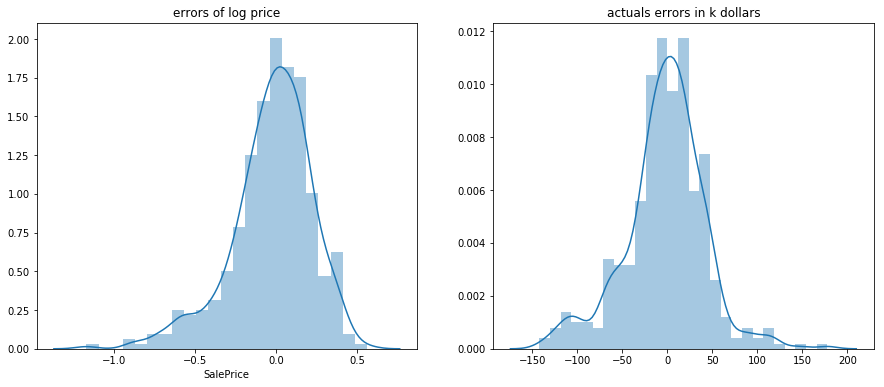

In [150]:
linear_regression_report(y_test,predictions)

In [151]:
model_predictions['linear_simple'] = predictions

To put this into perspective:

In [152]:
housing['SalePrice'].describe().astype(int)

count      1411
mean     181651
std       76451
min       34900
25%      131450
50%      164900
75%      214250
max      625000
Name: SalePrice, dtype: int32

Not really good, but a nice starting point! Let's see how good we can get!

### Multiple linear regression

Before throwing all features in there, we consider them one by one to check impact on log RMSE and explained variance.

In [153]:
y = housing[['SalePrice']]

In [154]:
potential_continuous_features = ['total_area','LotArea','YearBuilt','LotFrontage']

In [155]:
#continuous features
X_columns = potential_continuous_features
X = housing[X_columns]

In [156]:
y_test,predictions = linear_fitting(X,y)

Mean absolute error is 27213
Mean squared error is 1398034209
Root MSE is 37390
Maximum error is 174391
Log RMSE is 0.22
Explained variance is 75.772 percent.


Coefficient is [86.28758253]


Intercept is -40747.0


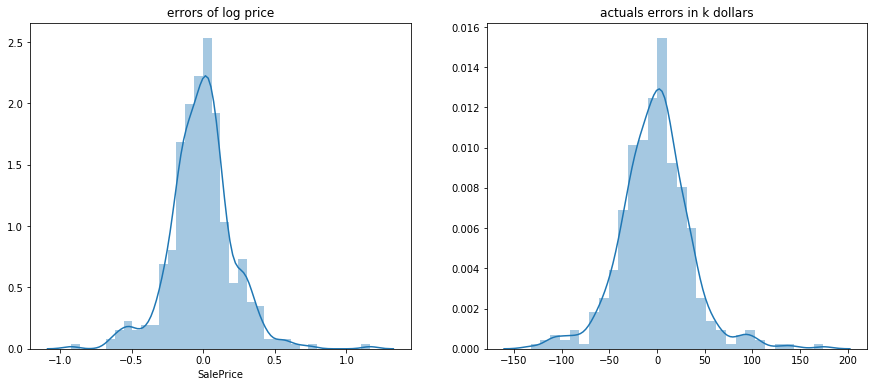

In [157]:
linear_regression_report(y_test,predictions)

In [158]:
model_predictions['linear_continuous'] = predictions

In [159]:
# Taken out: 
potential_discrete_features = ['CentralAir','HeatingQC','bathrooms','BedroomAbvGr','KitchenAbvGr','KitchenQual',
                               'other_rooms','combined_condition','Fireplaces','GarageCars']

In [160]:
# This can be done nicer...

MSSubClass = housing['MSSubClass'].unique().tolist()
MSZoning = housing['MSZoning'].unique().tolist()
HouseStyle = housing['HouseStyle'].unique().tolist()
BldgType = housing['BldgType'].unique().tolist()
Neighborhood = housing['Neighborhood'].unique().tolist()


potential_categorical_features = {'MSSubClass':MSSubClass,'MSZoning':MSZoning,'HouseStyle':HouseStyle,
                                  'BldgType':BldgType,'Neighborhood':Neighborhood}
potential_categorical_dummy_features = MSSubClass + MSZoning + HouseStyle + BldgType + Neighborhood
 
potential_categorical_features_names = ['MSZoning','HouseStyle','BldgType','Neighborhood','MSSubClass']

In [161]:
X = housing[potential_categorical_dummy_features]

In [162]:
y_test,predictions = linear_fitting(X,y)

In [163]:
#Only house 821 gives a very weird value (-98618346739003408), I do not know why. So why replace this
predictions.loc[821] = predictions[predictions > 0].mean()

Mean absolute error is 31501
Mean squared error is 2086506469
Root MSE is 45678
Maximum error is 233728
Log RMSE is 0.235
Explained variance is 63.753 percent.


Coefficient is [86.28758253]


Intercept is -40747.0


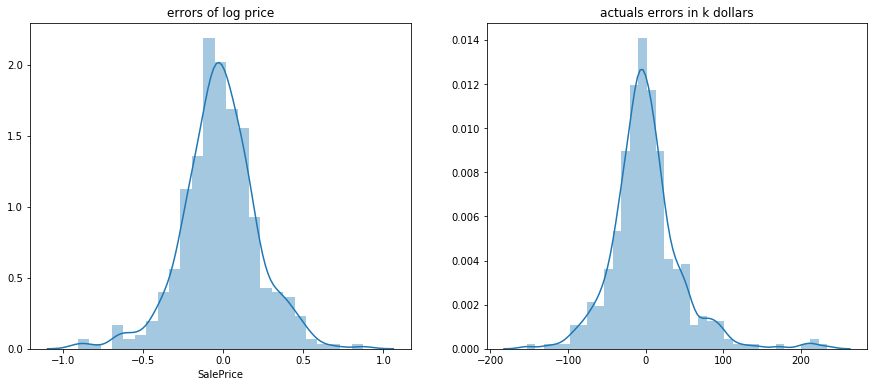

In [164]:
linear_regression_report(y_test,predictions)

In [165]:
model_predictions['linear_categorical'] = predictions

In [166]:
error_overview(potential_continuous_features)

,MAE(k),RMSE(k),max_error(k),log_RMSE,explained_variance(%)
total_area,32.7,44.7,178.0,0.251,65.4
LotArea,52.0,69.6,341.6,0.358,15.9
YearBuilt,45.8,63.1,330.1,0.330,30.7
LotFrontage,53.3,70.7,363.9,0.367,13.3


Adding LotFrontage had a negative impact on regression. 

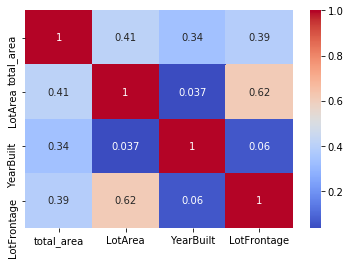

In [167]:
hc = housing[potential_continuous_features].corr()
sns.heatmap(hc,annot=True,cmap='coolwarm')

In [168]:
error_overview(potential_discrete_features)

,MAE(k),RMSE(k),max_error(k),log_RMSE,explained_variance(%)
CentralAir,54.3,73.0,371.1,0.367,7.4
HeatingQC,48.8,67.3,345.4,0.343,21.2
bathrooms,42.7,59.0,322.2,0.291,39.5
BedroomAbvGr,56.6,75.5,387.8,0.392,1.0
KitchenAbvGr,56.1,75.3,373.7,0.393,1.6
KitchenQual,40.7,56.0,261.4,0.301,45.6
other_rooms,42.1,56.8,232.6,0.308,44.0
combined_condition,45.9,62.6,302.1,0.323,32.0
Fireplaces,50.1,67.6,339.6,0.349,20.7
GarageCars,40.9,55.6,291.1,0.301,46.3


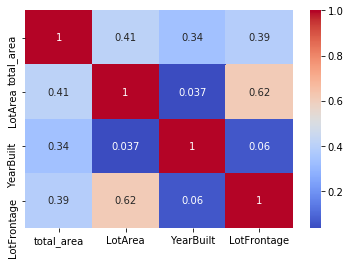

In [169]:
tc = housing[potential_discrete_features].corr()
sns.heatmap(hc,annot=True,cmap='coolwarm')

These below need to be grouped to be able to  compare with the above.

In [170]:
error_overview(potential_categorical_dummy_features)

,MAE(k),RMSE(k),max_error(k),log_RMSE,explained_variance(%)
60,50.9,69.7,387.6,0.360,15.6
20,57.2,75.7,378.0,0.395,0.4
70,57.0,75.7,374.8,0.395,0.3
50,56.0,75.1,370.6,0.393,2.0
190,56.9,75.6,373.9,0.396,0.6
45,56.3,75.2,374.7,0.390,1.7
120,56.7,75.7,376.3,0.395,0.4
30,54.6,73.3,370.7,0.370,6.7
85,56.8,75.7,374.6,0.396,0.4
90,56.4,75.5,374.1,0.395,0.9


In [171]:
error_overview_categorical(potential_categorical_features)

,MAE(k),RMSE(k),max_error(k),log_RMSE,explained_variance(%)
MSSubClass,46.8,65.3,368.5,0.321,25.9
MSZoning,50.5,70.0,365.2,0.346,14.8
HouseStyle,53.4,73.2,377.3,0.381,7.0
BldgType,56.1,74.8,371.0,0.391,2.8
Neighborhood,34.1,49.7,265.0,0.256,57.2


### Now combining all features:

In [172]:
all_features = potential_continuous_features + potential_discrete_features + potential_categorical_dummy_features

In [173]:
X = housing[all_features]

In [174]:
y_test,predictions = linear_fitting(X,y)

Mean absolute error is 17639
Mean squared error is 652518408
Root MSE is 25544
Maximum error is 145200
Log RMSE is 0.13
Explained variance is 88.736 percent.


Coefficient is [86.28758253]


Intercept is -40747.0


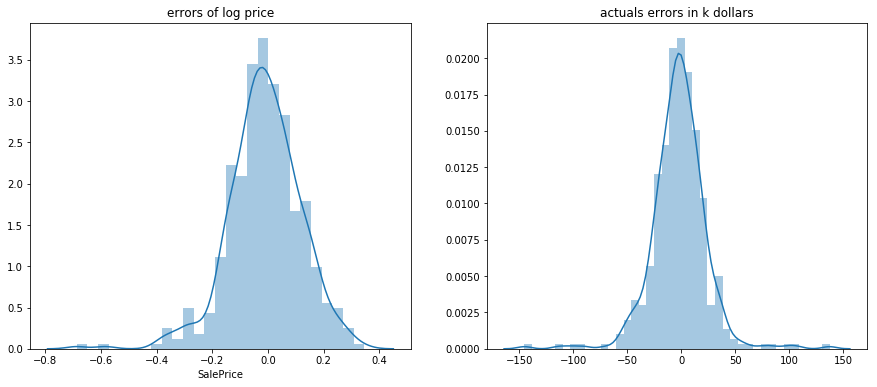

In [175]:
linear_regression_report(y_test,predictions)

In [176]:
model_predictions['linear_all'] = predictions

I think 88% is already a decent score, considering Dean de Cock (provider of the dataset and problem statement) achieved 92% with a lot of feature engineering. 

## Polynomial regression

Although we have no reason to assume polynomial regression will perform well (no obvious nonlinear relationships), we still include PR for completeness and for sake of practice. We stick to polynomials of degree 2 (quadratic). This will transform the n+1 linear features (including the intercept) into 2n + n(n-1)/2 + 1 polynomial features on which we will perform a linear regression. Eg for n = 2 we end up with 6 features: a,b -> a^2,b^2,a,b,ab, intercept. This means the number of features grows quickly, even more so if we would use a cubic regression or higher orders. So we must beware of overfitting and computation times.<br>

Including all the same features as in our multiple regression causes an explosion of features, and very odd predictions. Therefore (for now) we just work with the continuous features here.

In [177]:
from sklearn.preprocessing import PolynomialFeatures

In [178]:
#continuous features
X_columns = potential_continuous_features
X = housing[X_columns]

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [180]:
n = len(X_columns)
num_features = int(1+2*n+n*(n-1)/2)
print("nr of features is",num_features)

nr of features is 15


In [181]:
# Still have to figure out how go get the feature names in here below. Now just computed the number.
poly = PolynomialFeatures(degree=2)
X_train = pd.DataFrame(poly.fit_transform(X_train),index=y_train.index,columns=range(num_features))
pol_reg = LinearRegression()
pol_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [182]:
X_test = pd.DataFrame(poly.fit_transform(X_test),index=y_test.index,columns=range(num_features))

In [183]:
predictions = pd.DataFrame(pol_reg.predict(X_test),columns=['SalePrice'],index=y_test.index)

Mean absolute error is 24002
Mean squared error is 1133152221
Root MSE is 33662
Maximum error is 171690
Log RMSE is 0.189
Explained variance is 80.442 percent.


Coefficient is [86.28758253]


Intercept is -40747.0


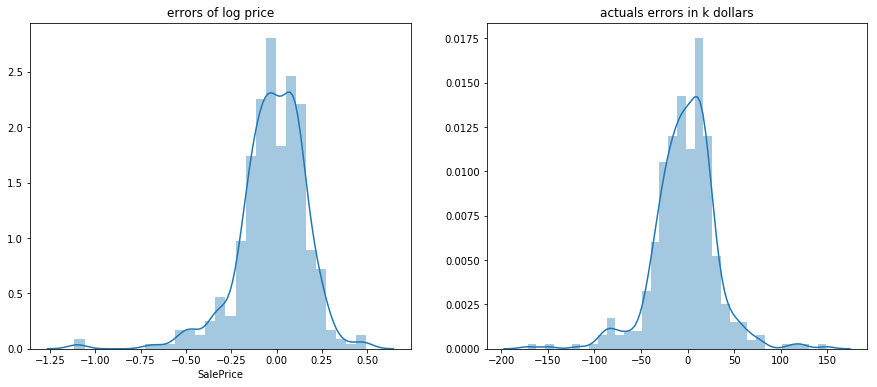

In [184]:
linear_regression_report(y_test,predictions)

This scores better than our linear regression on the same features!

In [185]:
model_predictions['polynomial'] = predictions

## <font color='red'>Group the three below</font>

## Ridge Regression, Lasso Regression, Elasticnet

Why use Ridge Regression? We are working with a relatively small data set, and for serveral features even smaller subsets, therefore the the effect of these features might be overestimated, thus leading to overfitting. Ridge regression includes a small bias with the goal of performing better on the test set. 

In [186]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [187]:
#continuous features
X_columns = all_features
X = housing[X_columns]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [188]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-6,1e-3,1e-2,1,5,10,20,50,100,200]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_absolute_error',cv=10,verbose=1)
ridge_regressor.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.90992e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.49517e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.02906e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.94062e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.60652e-21): result may not

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-06, 0.001, 0.01, 1, 5, 10, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [189]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 5}
19286.116295677904


In [190]:
predictions = pd.DataFrame(ridge_regressor.predict(X_test),index=y_test.index,columns=y_test.columns)

In [191]:
model_predictions['ridge'] = predictions

## Lasso Regression

Given that quite a number of variables might be of little use, Lasso could help us exclude those.

In [192]:
from sklearn.linear_model import Lasso

In [193]:
#continuous features
X_columns = all_features
X = housing[X_columns]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [194]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-6,1e-3,1e-2,1,5,10,20,50,100,200,500]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_absolute_error',cv=10)
lasso_regressor.fit(X_train,y_train)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-06, 0.001, 0.01, 1, 5, 10, 20, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [195]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-19219.719221460604


In [196]:
predictions = pd.DataFrame(lasso_regressor.predict(X_test),index=y_test.index,columns=y_test.columns)

In [197]:
model_predictions['lasso'] = predictions

## Elastic-Net Regression

Because there are many correlations between our features, Elastic-Net (a hybrid of Ridge and Lasso) might be a useful addition.

In [198]:
from sklearn.linear_model import ElasticNet

In [199]:
#continuous features
X_columns = all_features
X = housing[X_columns]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [200]:
elasticnet = ElasticNet()
# parameters = {'alpha':[1e-15,1e-10,1e-6,1e-3,1e-2,1,5,10,20,50,100,200,500]}
parameters = {"max_iter": [1, 5, 10],
                  "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": np.arange(0.0, 1.0, 0.1)}
elasticnet_regressor = GridSearchCV(elasticnet,parameters,scoring='neg_mean_absolute_error',cv=10)
elasticnet_regressor.fit(X_train,y_train)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You migh

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [1, 5, 10], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [201]:
print(elasticnet_regressor.best_params_)
print(elasticnet_regressor.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 10}
-19388.890880521052


In [202]:
predictions = pd.DataFrame(elasticnet_regressor.predict(X_test),index=y_test.index,columns=y_test.columns)

In [203]:
model_predictions['elastic_net'] = predictions

The performance of Ridge, Lasso and ElasticNet do not differ much, and score worse than just Linear Regression.

## Decision Tree / Random Forest Regressor

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
#continuous features
X_columns = all_features
X = housing[X_columns]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [206]:
rf_errors = []
for i in range(50,400,50):
    regressor = RandomForestRegressor(n_estimators=i, random_state=0,verbose=0)  
    regressor.fit(X_train, y_train)  
    predictions = pd.DataFrame(regressor.predict(X_test),index=y_test.index,columns=y_test.columns)
    MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
    rf_errors.append(log_RMSE)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Text(0.5, 1.0, 'log RMSE vs nr trees')

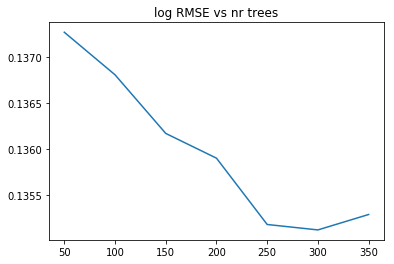

In [207]:
plt.plot(range(50,400,50),rf_errors)
plt.title('log RMSE vs nr trees')

## <font color='red'>Rewrite LR report to general model form</font>

In [208]:
MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
print('MAE',MAE)
print('RMSE',RMSE)
print('max_error',max_error)
print('log_RMSE',log_RMSE)
print('expl_var',expl_var)

MAE 17099.42135194455
RMSE 26113.962930834336
max_error 143202.4942857143
log_RMSE 0.13528703479482432
expl_var 0.8824847130394055


In [209]:
model_predictions['random_forest'] = predictions

## Gradient Boosting

In [210]:
from sklearn import ensemble

In [211]:
X_columns = all_features
X = housing[X_columns]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

Before finetuning we have to specify the boosting criterion. I do not know whether it is possible to directly include log RMSE, so I will just try mse, friedman_mse and mae.

In [212]:
criteria = ['mse','friedman_mse','mae']
gb_errors = []

for crit in criteria:
    params = {
        'n_estimators': 100,
        'learning_rate': 0.1,
        'max_depth': 3,
        'criterion': crit,
        'random_state': 42
    }

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(X_train, y_train)
    predictions = pd.DataFrame(gradient_boosting_regressor.predict(X_test),index=y_test.index,columns=y_test.columns)
    MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
    gb_errors.append(log_RMSE)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'log RMSE vs different criteria')

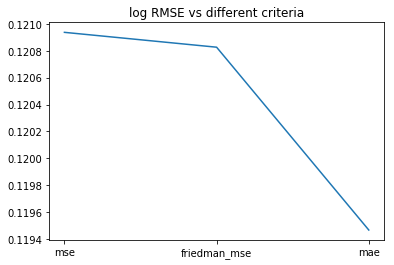

In [213]:
plt.plot(criteria,gb_errors)
plt.title('log RMSE vs different criteria')

We will stick to MAE.

One by one we will tune the parameters. I realise this might lead to a local optimum, but creating a for checking all paramters at the same time will cost too much computation time. <br>
First the learning rate.

In [214]:
# initial selection was learning_rates = [0.5,0.25,0.1,0.05,0.01], but finetuned:
learning_rates = [0.5,0.25,0.1,0.05,0.01]
gb_errors = []

for learn in learning_rates:
    print(learn)
    params = {
        'n_estimators': 100,
        'learning_rate': learn,
        'max_depth': 3,
        'criterion': 'mae',
        'random_state': 42
    }

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(X_train, y_train)
    predictions = pd.DataFrame(gradient_boosting_regressor.predict(X_test),index=y_test.index,columns=y_test.columns)
    MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
    gb_errors.append(log_RMSE)

0.5


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.25


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.05


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.01


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'log RMSE vs learning rate')

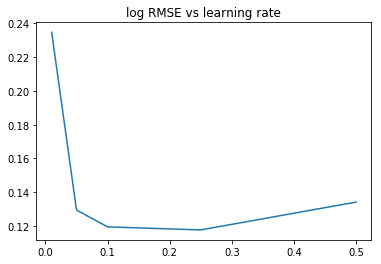

In [215]:
plt.plot(learning_rates,gb_errors)
plt.title('log RMSE vs learning rate')

Now we will tune for the number of trees.

In [216]:
n_estimators = [25,50,100,150,200,300]
gb_errors = []

for n in n_estimators:
    print(n)
    params = {
        'n_estimators': n,
        'learning_rate': 0.25,
        'max_depth': 3,
        'criterion': 'mae',
        'random_state': 42
    }

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(X_train, y_train)
    predictions = pd.DataFrame(gradient_boosting_regressor.predict(X_test),index=y_test.index,columns=y_test.columns)
    MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
    gb_errors.append(log_RMSE)

25


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


150


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


200


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


300


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'log RMSE vs nr of estimators')

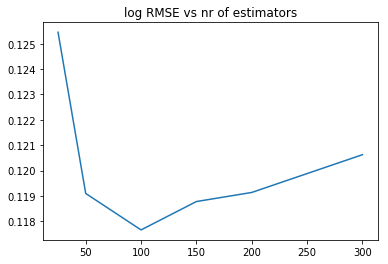

In [217]:
plt.plot(n_estimators,gb_errors)
plt.title('log RMSE vs nr of estimators')

100 is a clear winner. The default is best. Now let's see whether extending the max depth could lead to improvements.

In [218]:
#depth = range(1,7)
depth = [3]
gb_errors = []

for d in depth:
    print(d)
    params = {
        'n_estimators': 100,
        'learning_rate': 0.25,
        'max_depth': d,
        'criterion': 'mae',
        'random_state': 42
    }

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(X_train, y_train)
    predictions = pd.DataFrame(gradient_boosting_regressor.predict(X_test),index=y_test.index,columns=y_test.columns)
    MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
    gb_errors.append(log_RMSE)

3


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'log RMSE vs max depth')

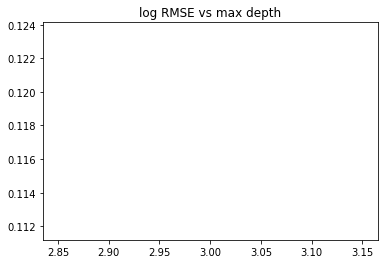

In [219]:
plt.plot(depth,gb_errors)
plt.title('log RMSE vs max depth')

So also here we can stick to the default of 3.

In [220]:
params = {
    'learning_rate': 0.25,
    'criterion': 'mae',
    'random_state': 42
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor.fit(X_train, y_train)
predictions = pd.DataFrame(gradient_boosting_regressor.predict(X_test),index=y_test.index,columns=y_test.columns)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [221]:
MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
print('MAE',MAE)
print('RMSE',RMSE)
print('max_error',max_error)
print('log_RMSE',log_RMSE)
print('expl_var',expl_var)

MAE 15586.542767490248
RMSE 23867.64003098618
max_error 142496.39916563028
log_RMSE 0.11766626329613875
expl_var 0.9016330975118089


In [222]:
model_predictions['boosting'] = predictions

If time, I will also try for different max_features, min_samples_leaf or min_samples_splits.

## Support Vector Regression

In [223]:
from sklearn.svm import SVR

In [224]:
X_columns = all_features
X = housing[X_columns]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

Again we will do parameter tuning. First check different kernels, though linear makes sense.

In [225]:
kernels = ['rbf','linear']
svr_errors = []

for k in kernels:
    print(k)
    svr=SVR(kernel=k,verbose=0)
    svr.fit(X_train,y_train)
    predictions = pd.DataFrame(svr.predict(X_test),index=y_test.index,columns=y_test.columns)

    MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
    svr_errors.append(log_RMSE)

rbf


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


linear


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'log RMSE vs kernel')

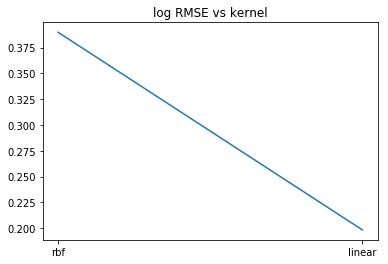

In [226]:
plt.plot(kernels,svr_errors)
plt.title('log RMSE vs kernel')

In [227]:
MAE, RMSE, max_error, log_RMSE, expl_var = errors(y_test,predictions)
print('MAE',MAE)
print('RMSE',RMSE)
print('max_error',max_error)
print('log_RMSE',log_RMSE)
print('expl_var',expl_var)

MAE 26004.906252475812
RMSE 36906.37674911898
max_error 199381.10182541725
log_RMSE 0.19842059726690212
expl_var 0.7639791315906713


In [228]:
model_predictions['svr'] = predictions

# Comparison of different models

Summary of the performance of the different models:

In [229]:
overview = model_overview(model_predictions)
overview.sort_values('log_RMSE')

,MAE(k),RMSE(k),max_error(k),log_RMSE,explained_variance(%)
boosting,15.6,23.9,142.5,0.11767,90.2
linear_all,17.6,25.5,145.2,0.13043,88.7
ridge,17.4,25.5,144.6,0.13051,88.8
lasso,17.3,25.4,146.1,0.13121,88.9
elastic_net,17.5,25.5,146.7,0.13203,88.8
random_forest,17.1,26.1,143.2,0.13529,88.2
polynomial,24.0,33.7,171.7,0.18890,80.4
svr,26.0,36.9,199.4,0.19842,76.4
linear_continuous,27.2,37.4,174.4,0.22032,75.8
linear_categorical,31.5,45.7,233.7,0.23453,63.8


In [230]:
#Submission file
submission = model_predictions['boosting']
submission.to_csv('submission.csv',sep=',')
